# MNIST using K-Means Clustering

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,test_size=0.20, random_state=0)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train,test_size=0.20, random_state=0)

In [4]:
def kmeansinitcentroids(X,k):
    centroids = X
    np.random.seed(8)
    np.random.shuffle(centroids)
    return centroids[:k,:]

In [5]:
def eucledian_distance(v1,v2):
    
    distance = 0
    
    for i in range (len(v1)):
        distance = distance + (v1[i]-v2[i])**2
        
    return np.sqrt(distance)

In [6]:
def findclosestcentroids(x,centroids,k):
    
    index = []
    
    for i in range(len(x)):
        temp = []
        for j in range(len(centroids)):
            dist = eucledian_distance(x[i],centroids[j])
            temp.append(dist)
        index.append(np.argmin(temp))
    
    return index   

In [7]:
def computeCentroidnotmean(x,index,k,prevcentroid):
    centroids = []

    for i in range(k):
        temp = []
        for j in range(len(index)):
            if(index[j] == i):
                temp.append(x[j])
            
        y = np.mean(temp,axis = 0)
        temp2 = []
        
        for z in range(len(temp)):
            dist = eucledian_distance(y,temp[z])
            temp2.append(dist)
        z = np.argmin(temp2)
        
        centroids.append(temp[z])

    return centroids  

In [8]:
def computeCentroid(x,index,k,prevcentroid):
    centroids = []

    for i in range(k):
        temp = []
        for j in range(len(index)):
            if(index[j] == i):
                temp.append(x[j])
            
        y = np.mean(temp,axis = 0)
        print(y.shape)
        centroids.append(y)

    return centroids  

In [9]:
k = 10
it = 100

centroid = kmeansinitcentroids(x_train,k)
for i in range(0,it):
    idx = findclosestcentroids(x_train,centroid,k) 
    prevcentroid = centroid
    centroid = computeCentroidnotmean(x_train,idx,k,prevcentroid)
    

In [10]:
def predict(x,centroid):
    
    cluster = []
    
    for i in range(len(x)):
        distance = []
        for j in range(len(centroid)):
            dist = eucledian_distance(x[i],centroid[j])
            distance.append(dist)
        cluster.append(np.argmin(distance))
        
    return cluster

In [11]:
len(centroid)

10

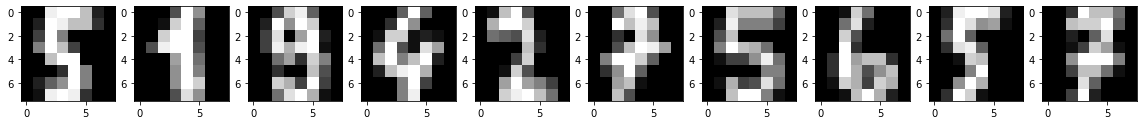

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image) in enumerate(zip(centroid[0:10])):
    plt.subplot(1,10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
